# Name: Nada Hammami
Data Science and Business Analytics Internship

Task-1:Prediction using Supervised Machine Learning

Predict the percentage of the score of a student based on his number of study hours

What score will be predicted if the student studies 9.25h/day? 

In [14]:
! pip install seaborn

In [15]:
# Imorting libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Step1:Reading the data from source

In [19]:
# Read the CSV file into a DataFrame
df = pd.read_csv("data.csv")
# Display the DataFrame
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [22]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [27]:
# checking more about null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [25]:
df.size

50

# Visualizing the data

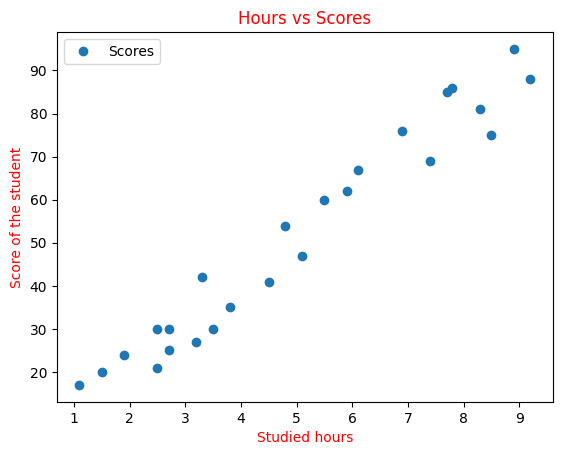

In [34]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Scores',color='red')
plt.xlabel('Studied hours',color='red')
plt.ylabel('Score of the student',color='red')
plt.show()


From the above graph we can see that there's a correlation between the studied hours and the student's score  

# Data Preprocessing 

In [40]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Training the model

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# 20% of the data will be used fot testing and 80% for training
# random_state=0 means if we run the code multiple times we'll get the same result

In [44]:
# Training the model
regression=LinearRegression()
regression.fit(x_train,y_train)
print('model trained...')

model trained...


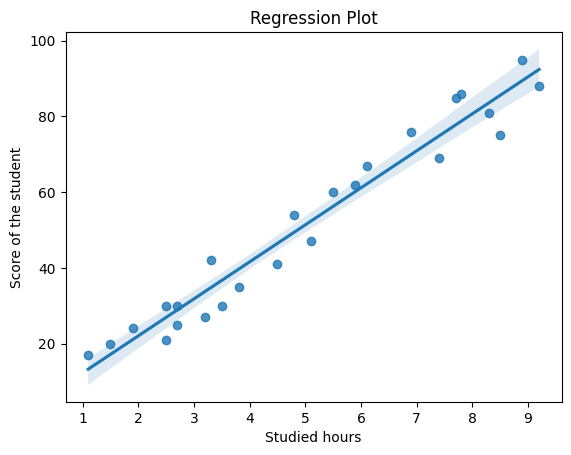

In [46]:
sns.regplot(x='Hours', y='Scores', data=df)
plt.title('Regression Plot')
plt.xlabel('Studied hours')
plt.ylabel('Score of the student')
plt.show()

From the above graph,it's confirmed that the variable are positivley correlated.

In [49]:
# Now pretending the percentage score
y_pred = regression.predict(x_test)

#Comparing the predicted score with the actual score
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


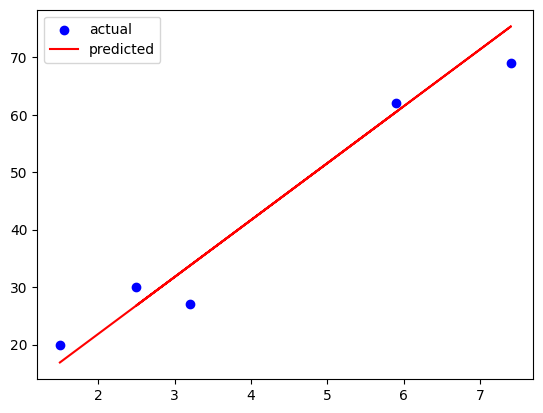

In [52]:
#visualising predicted score vs actual score
# we use scatter to identifie patterns
plt.scatter(x=x_test,y=y_test,color='blue',label="actual")
plt.plot(x_test,y_pred,color='red',label='predicted')
plt.legend()


In [53]:
# evaluating the model,calculating the accuracy of the model
# MAE:measures the average absolute difference between the predicted values and the actual values in a dataset
print('Mean absolute error:', mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.183859899002975


In [56]:
# what will be the predicted score if a student 9.25 hrs/day?
hours=[9.25]
ans=regression.predict([hours])
print("Score={}".format(round(ans[0],3)))

Score=93.692
